# 6.5 Unsupervised Machine Learning Task

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data Preparation
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

**Question 1 - Install and import all necessary libraries in your Jupyter notebook.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = "/Users/auralynnrosario/Documents/11-2025 Gun Violence Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','gun_violence_checked.csv'))

In [5]:
df.shape

(239677, 24)

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


In [9]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age_group', 'participant_gender', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district',
       'guns_count_known', 'congressional_known', 'state_house_known',
       'state_senate_known'],
      dtype='object')

In [10]:
df.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
congressional_district      float64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
latitude                    float64
longitude                   float64
n_guns_involved             float64
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
state_house_district        float64
state_senate_district       float64
guns_count_known              int64
congressional_known           int64
state_house_known             int64
state_senate_known            int64
dtype: object

# 2. Data Preparation

**Question 2 - conduct any necessary cleaning, manipulations, and reprocessing (such as renaming)**

In [11]:
# columns I want to use for k-means

feature_cols = [
    'n_killed',
    'n_injured',
    'n_guns_involved',
    'latitude',
    'longitude']

In [12]:
# new dataframe just for k-means

df_kmeans = df[feature_cols].copy()

In [13]:
# drop rows with missing values in any of these columns
df_kmeans = df_kmeans.dropna().reset_index(drop=True)

df_kmeans.head()

,n_killed,n_injured,n_guns_involved,latitude,longitude
0,1,3,2.0,41.4455,-82.1377
1,2,2,2.0,36.1140,-79.9569
2,5,0,2.0,34.9791,-106.7160
3,1,3,1.0,35.0221,-85.2697
4,1,3,1.0,38.7067,-90.2494


In [14]:
%whos DataFrame

Variable    Type         Data/Info
----------------------------------
df          DataFrame            incident_id      <...>239677 rows x 23 columns]
df_kmeans   DataFrame            n_killed  n_injur<...>[132318 rows x 5 columns]


# 3. The Elbow Technique

**Question 3 - Use the elbow technique as shown in the Jupyter notebook for this Exercise.**

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-35147981.74803196,
 -14564783.529429711,
 -10504991.600240655,
 -9094012.738338582,
 -7205771.66640266,
 -5869424.675708769,
 -4481416.408672226,
 -4141698.005669401,
 -3700616.7772701867]

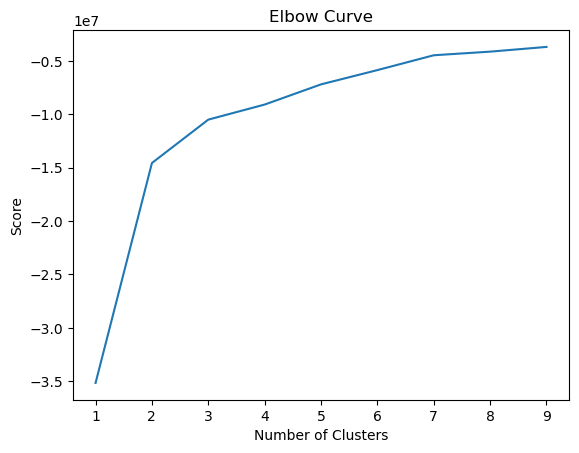

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Question 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.**

The elbow chart shows that 3 clusters is best. After 3, the line starts to flatten, which means adding more clusters doesn’t improve the model very much.

# 4. k-means clustering

**Question 5 - Run the k-means algorithm.**

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_kmeans)

KMeans(n_clusters=3)

**Question 6 - Attach a new column to your dataframe with the resulting clusters as shown in the Exercise.**

In [20]:
df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans)

In [21]:
df_kmeans.head(10)

,n_killed,n_injured,n_guns_involved,latitude,longitude,clusters
0,1,3,2.0,41.4455,-82.1377,1
1,2,2,2.0,36.1140,-79.9569,1
2,5,0,2.0,34.9791,-106.7160,2
3,1,3,1.0,35.0221,-85.2697,0
4,1,3,1.0,38.7067,-90.2494,0
5,2,3,1.0,29.8816,-91.5251,0
6,0,5,1.0,38.8978,-76.9717,1
7,0,5,1.0,35.0803,-89.8871,0
8,1,3,1.0,39.1236,-121.5830,2
9,0,4,1.0,29.9563,-90.0676,0


In [22]:
df_kmeans['clusters'].value_counts()

clusters
1    59391
0    53883
2    19044
Name: count, dtype: int64

**Question 7 - Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.**

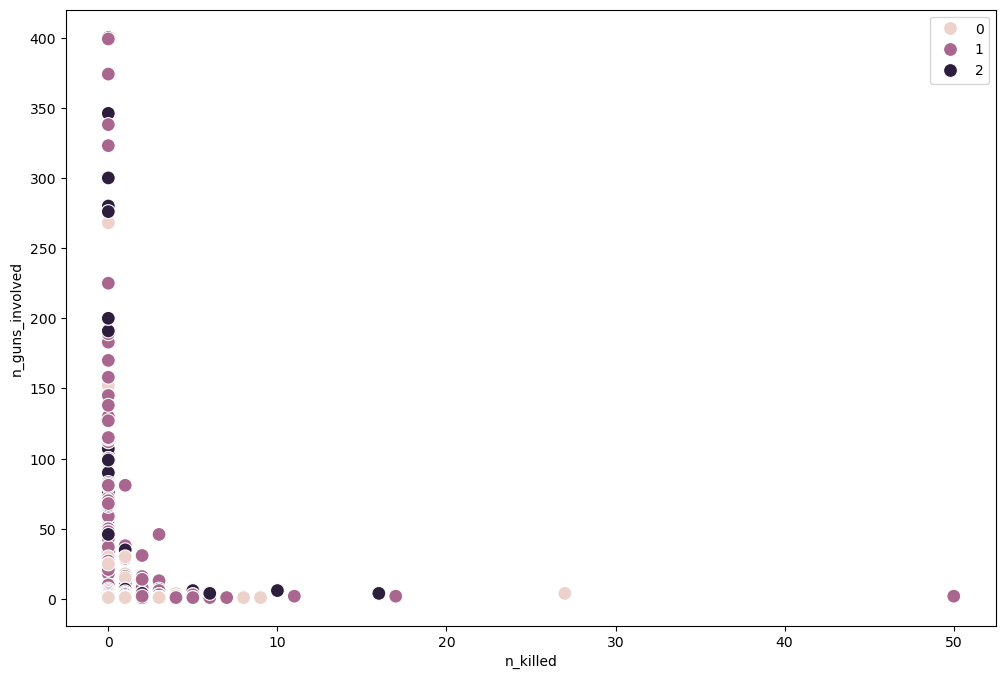

In [23]:
# Plot the clusters for the "n_killed" and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['n_killed'], y=df_kmeans['n_guns_involved'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_killed') # Label x-axis.
plt.ylabel('n_guns_involved') # Label y-axis.
plt.show()

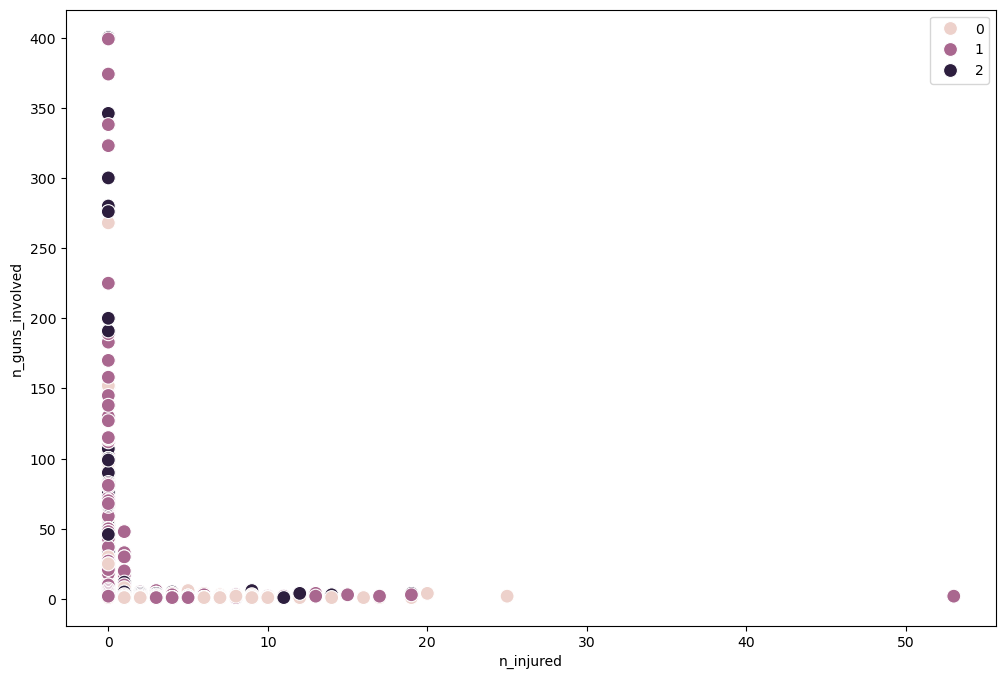

In [24]:
# Plot the clusters for the "n_injured" and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['n_injured'], y=df_kmeans['n_guns_involved'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('n_injured') 
plt.ylabel('n_guns_involved') 
plt.show()

**Question 8 - Discuss how and why the clusters make sense.**

I forgot that the difference between my variables’ scales can’t be too large, and in this case it is because n_killed and n_injured is mostly 0–5, while n_guns_involved can go up to 400+. I need further assistance here. I can't decide whether I should standardize or remove extreme outliers or use a shooting only dataframe? Though not all "injured" means shooting; people could have been injured (pistol whipped) and I want to keep those. I'm going to remove both extreme outliers and standardize as the difference is too great.

In [35]:
# Check value counts for n_guns

guns_counts = df['n_guns_involved'].value_counts().sort_index()

In [36]:
guns_counts.head(20)

n_guns_involved
1.0     127548
2.0       7477
3.0       2021
4.0        871
5.0        435
6.0        285
7.0        232
8.0        137
9.0        111
10.0       103
11.0        67
12.0        93
13.0        67
14.0        53
15.0        54
16.0        41
17.0        56
18.0        34
19.0        25
20.0        48
Name: count, dtype: int64

In [25]:
# keep incidents below the 99th percentile of guns involved

q99 = df_kmeans['n_guns_involved'].quantile(0.99)
df_kmeans = df_kmeans[df_kmeans['n_guns_involved'] <= q99]

In my clustering dataframe, I kept incidents with up to 7 guns and dropped the rare cases with more than 7 guns.

In [26]:
scaler = StandardScaler()  # this tool will standardize (scale) your features

# Fit the scaler on df_kmeans and transform the data to a scaled numpy array
X_scaled = scaler.fit_transform(df_kmeans)

# Turn the scaled numpy array back into a DataFrame, keeping the same column names
df_kmeans_scaled = pd.DataFrame(X_scaled, columns=df_kmeans.columns)

In [27]:
# choose number of clusters (from your elbow: 3)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_kmeans_scaled)   # use the SCALED data

KMeans(n_clusters=3, random_state=42)

In [28]:
# add cluster labels as a new column
df_kmeans['cluster'] = kmeans.labels_

In [29]:
df_kmeans.head()

,n_killed,n_injured,n_guns_involved,latitude,longitude,clusters,cluster
0,1,3,2.0,41.4455,-82.1377,1,1
1,2,2,2.0,36.1140,-79.9569,1,0
2,5,0,2.0,34.9791,-106.7160,2,0
3,1,3,1.0,35.0221,-85.2697,0,2
4,1,3,1.0,38.7067,-90.2494,0,0


In [31]:
df_kmeans.drop(columns='clusters', inplace=True)  # drop the old one
# and keep:
# df_kmeans['cluster']

In [32]:
df_kmeans.head()

,n_killed,n_injured,n_guns_involved,latitude,longitude,cluster
0,1,3,2.0,41.4455,-82.1377,1
1,2,2,2.0,36.1140,-79.9569,0
2,5,0,2.0,34.9791,-106.7160,0
3,1,3,1.0,35.0221,-85.2697,2
4,1,3,1.0,38.7067,-90.2494,0


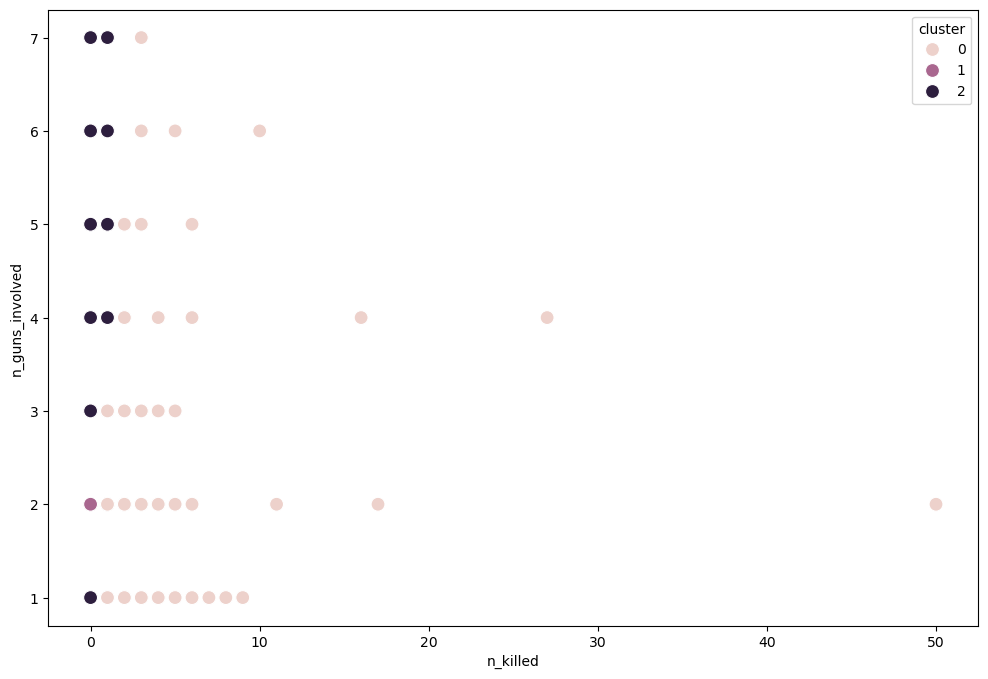

In [33]:
# Plot the clusters for the "n_killed" and "n_guns_involved" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_kmeans['n_killed'],
    y=df_kmeans['n_guns_involved'],
    hue=df_kmeans['cluster'],   # <— use ONE clear column
    s=100
)
ax.grid(False)
plt.xlabel('n_killed')
plt.ylabel('n_guns_involved')
plt.show()


One cluster (light pink) tends to include the more extreme incidents, where more people were killed (points further to the right).
The other two clusters (darker colors) mostly contain lower-fatality incidents with 0–2 people killed.

However, the colors are still mixed together. Incidents that look very similar (same killed and same guns) can end up in different clusters. This tells me that the clusters are not very clear or easy to explain using only n_killed and n_guns_involved.

To get more meaningful groups, I may need to add more features (like total victims, incident type, or location) or try a different way of grouping the data.

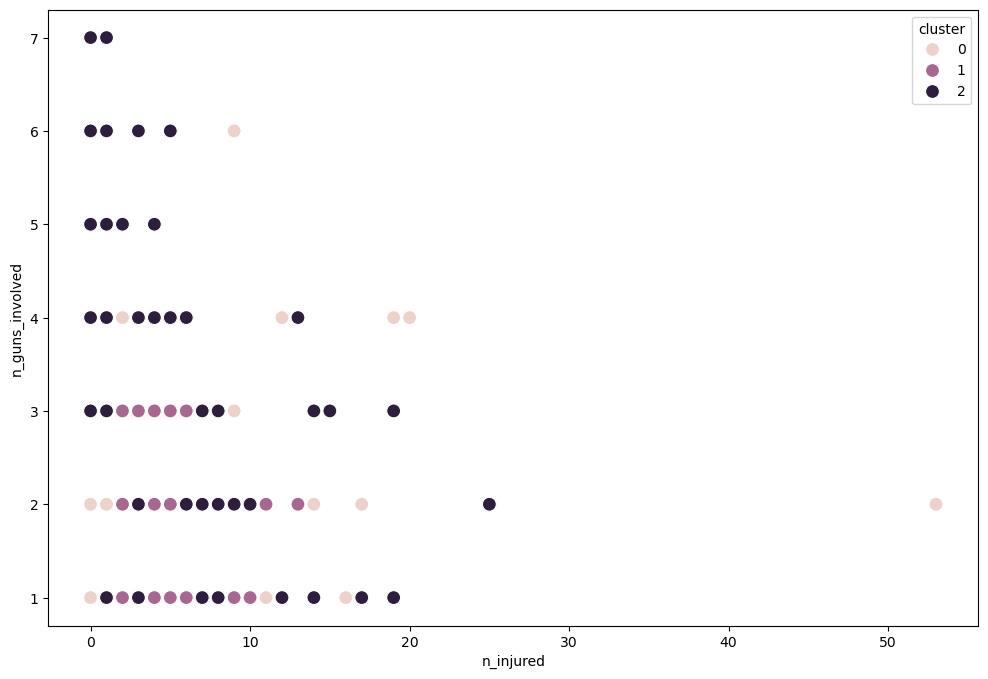

In [37]:
# Plot the clusters for the "n_injured" and "n_guns_involved" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_kmeans['n_injured'],
    y=df_kmeans['n_guns_involved'],
    hue=df_kmeans['cluster'],   # <— use ONE clear column
    s=100
)
ax.grid(False)
plt.xlabel('n_injured')
plt.ylabel('n_guns_involved')
plt.show()

One cluster (light pink) includes several more serious incidents, where many people were injured (points further to the right), often with 2–4 guns. The darker clusters mostly contain incidents with fewer injuries (0–5 injured), spread across 1–7 guns.

But again, the colours are mixed together. Incidents with the same number of injured people and the same number of guns can appear in different clusters. This tells me that the clusters are not very clean or obvious when we just look at n_injured and n_guns_involved.

Overall, there is a rough split by injury severity, but it’s weak. To get clearer clusters, I might need more features (like total victims or incident type) or a different way of grouping the data.

**Question 9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.**

In [41]:
df_kmeans.loc[df_kmeans['cluster'] == 2, 'cluster'] = 'dark purple'
df_kmeans.loc[df_kmeans['cluster'] == 1, 'cluster'] = 'purple'
df_kmeans.loc[df_kmeans['cluster'] == 0, 'cluster'] = 'pink'

/var/folders/s5/hg0_ksw94j96r4w7qlydqvzr0000gn/T/ipykernel_96709/1413705663.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_kmeans.loc[df_kmeans['cluster'] == 2, 'cluster'] = 'dark purple'


In [42]:
df_kmeans.groupby('cluster').agg({'n_guns_involved':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'n_killed':['mean', 'median']})

n_guns_involved        n_injured         n_killed       
                       mean median      mean median      mean median
cluster                                                             
dark purple        1.299799    1.0  0.532939    0.0  0.010300    0.0
pink               1.045271    1.0  0.184175    0.0  1.143413    1.0
purple             1.086090    1.0  0.523439    0.0  0.004889    0.0

**Question 10 - Propose what these results could be useful for in future steps of an analytics pipeline.**

These cluster statistics help me understand what kind of incidents are in each group:

Pink cluster: on average has more people killed than the others.
Dark purple and purple clusters: usually have fewer people killed, with some injuries.

Knowing this is useful for my next steps because:

I can describe each cluster in plain language (for example, “more deadly incidents” vs “less deadly incidents”).

I can now explore what else is different between these groups, like where they happen, when they happen, or what types of incidents they are.

I can use the cluster labels later as a new column in my data to help with other analysis or future models (for example, comparing clusters by state or over time).

So these stats are like a first summary of “incident types” that I can build on in the rest of the analysis.